# Analysis of $N_2$ in a static electric field

We consider a $N_2$ molecule in a static electric field. We present results for fields both directed in the z (axial) and in the x directions. 

The main aim of this analysis is to determine the minimum dimension allowed of the simulation box as a function of the field intensity. As a criterium of consistency we require that the energy of the occupied KS orbitals should remain constant as the dimension of the box is increased.  

In [1]:
from BigDFT import Logfiles as lf
from futile import Yaml
import matplotlib.pyplot as plt
inputpath = 'input/'

First of all we define the python dictionary that contains the basic keys common to all the file in the run

In [2]:
inp0 = {'dft' : 
        {'hgrids': 0.4,
         'itermax' : 100},
        'posinp': 'N2_posinp.xyz'}

and we write these common variables in the default file (named "default.yaml" according to BigDFT specification):

In [3]:
Yaml.dump(inp0,inputpath + 'default.yaml')

We perform the analysis for different values of the field norm.

We build the following lists, with the values of the x and z components of the induced dipole moments (corresponding to the largest simulation box) and of the fields. We use these values to check the linearity of the dipole moments with respect to the field

In [4]:
dipoleX=[]
dipoleZ=[]
eFieldX=[]
eFieldZ=[]

# $E$-norm = $1e^{-4}$

## Set up of the simulations

We build a set of input files with increasing values of the box dimension for both the x and z electric field configurations. 

In [5]:
enorm = 1e-4
en = str('1em4_')

In [6]:
ez=[0.0,0.0,enorm]
ex=[enorm,0.0,0.0]

In [7]:
inpEz={'dft':{'elecfield': ez}}
inpEx={'dft':{'elecfield': ex}}

In [8]:
rmult = [[float(i), 9.0] for i in range(7,10)]
rmult

[[7.0, 9.0], [8.0, 9.0], [9.0, 9.0]]

In [9]:
lrun=[]
for r in rmult:
    inpEz['dft']['rmult'] = r
    inpEx['dft']['rmult'] = r
    inpnameEz = 'Ez_'+en+str('rmult_')+str(r[0])
    inpnameEx = 'Ex_'+en+str('rmult_')+str(r[0])
    Yaml.dump(inpEz,inputpath + inpnameEz + '.yaml')
    Yaml.dump(inpEx,inputpath + inpnameEx + '.yaml')
    lrun.append(inpnameEz)
    lrun.append(inpnameEx)
Yaml.dump(lrun,inputpath+'runs_'+en)

We execute the single file with the command:

OMP_NUM_THREADS=1 mpirun -np 8 $BIGDFT_ROOT/bigdft -d ../log/ -n namefile

or the sequence of file in the runs as:

OMP_NUM_THREADS=1 mpirun -np 8 $BIGDFT_ROOT/bigdft -d ../log/ -r runs_en

if we want to not run again the runs already performed the command is as:

OMP_NUM_THREADS=1 mpirun -np 8 $BIGDFT_ROOT/bigdft -d ../log/ -r runs_en -s yes

## Data analysis

Now we plot the energy of the KS orbitals as a function of the dimension of the box. We import the log files with the results of the simulations:

In [10]:
logsEx = !ls log/log-Ex_1em4*
Ex=[lf.Logfile(l) for l in logsEx]
nRunEx=len(Ex)
print(logsEx)

logsEz = !ls log/log-Ez_1em4*
Ez=[lf.Logfile(l) for l in logsEz]
nRunEz=len(Ez)
print(logsEz)

['log/log-Ex_1em4_rmult_7.0.yaml', 'log/log-Ex_1em4_rmult_8.0.yaml', 'log/log-Ex_1em4_rmult_9.0.yaml']
['log/log-Ez_1em4_rmult_7.0.yaml', 'log/log-Ez_1em4_rmult_8.0.yaml', 'log/log-Ez_1em4_rmult_9.0.yaml']


for each run i the lists Ex[i].evals[0][0] and Ez[i].evals[0][0] contain the energy of the orbitals, for instance:

In [11]:
Ez[0].evals[0][0]

BandArray([-1.03253096, -0.49763623, -0.43147406, -0.43147406, -0.38199635])

The number of orbitals is given by

In [12]:
norb =len(Ex[0].evals[0][0])

we introduce the lists enEx[i], enEz[i] (with i in range(norb)) that contains the energy of the i-th orbital for
all the runs

In [13]:
enEx=[]
for orb in range(norb):
    eorb=[]
    for run in range(nRunEx):
        eorb.append(Ex[run].evals[0][0][orb])
    enEx.append(eorb)

enEz=[]
for orb in range(norb):
    eorb=[]
    for run in range(nRunEx):
        eorb.append(Ez[run].evals[0][0][orb])
    enEz.append(eorb)

In [14]:
dimBoxEx=[]
dimBoxEz=[]
for ind in range(nRunEx):
    dimBoxEx.append(Ex[ind].log['Sizes of the simulation domain']['Angstroem'][0])
    dimBoxEz.append(Ez[ind].log['Sizes of the simulation domain']['Angstroem'][0])

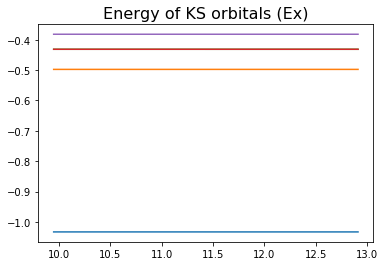

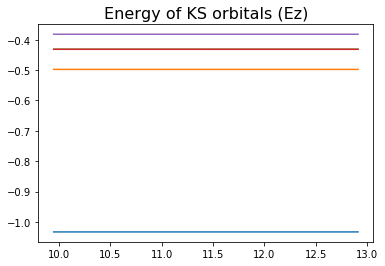

In [15]:
for orb in range(norb):
    plt.plot(dimBoxEx,enEx[orb])
plt.title('Energy of KS orbitals (Ex)',fontsize=16)
plt.show()

for orb in range(norb):
    plt.plot(dimBoxEz,enEz[orb])
plt.title('Energy of KS orbitals (Ez)',fontsize=16)
plt.show()

In [16]:
dipoleX.append(Ex[nRunEx-1].log['Electric Dipole Moment (AU)']['P vector'][0])
dipoleZ.append(Ez[nRunEx-1].log['Electric Dipole Moment (AU)']['P vector'][2])
eFieldX.append(enorm)
eFieldZ.append(enorm)

# $E$-norm = $1e^{-3}$

## Set up of the simulations

We build a set of input files with increasing values of the box dimension for both the x and z electric field configurations. 

In [17]:
enorm = 1e-3
en = str('1em3_')

In [18]:
ez=[0.0,0.0,enorm]
ex=[enorm,0.0,0.0]

In [19]:
inpEz={'dft':{'elecfield': ez}}
inpEx={'dft':{'elecfield': ex}}

In [20]:
rmult = [[float(i), 9.0] for i in range(4,10)]
rmult

[[4.0, 9.0], [5.0, 9.0], [6.0, 9.0], [7.0, 9.0], [8.0, 9.0], [9.0, 9.0]]

In [21]:
lrun=[]
for r in rmult:
    inpEz['dft']['rmult'] = r
    inpEx['dft']['rmult'] = r
    inpnameEz = 'Ez_'+en+str('rmult_')+str(r[0])
    inpnameEx = 'Ex_'+en+str('rmult_')+str(r[0])
    Yaml.dump(inpEz,inputpath + inpnameEz + '.yaml')
    Yaml.dump(inpEx,inputpath + inpnameEx + '.yaml')
    lrun.append(inpnameEz)
    lrun.append(inpnameEx)
Yaml.dump(lrun,inputpath+'runs_'+en)

## Data analysis

Now we plot the energy of the KS orbitals as a function of the dimension of the box. We import the log files with the results of the simulations:

In [22]:
logsEx = !ls log/log-Ex_1em3*
Ex=[lf.Logfile(l) for l in logsEx]
nRunEx=len(Ex)
print(logsEx)

logsEz = !ls log/log-Ez_1em3*
Ez=[lf.Logfile(l) for l in logsEz]
nRunEz=len(Ez)
print(logsEz)

['log/log-Ex_1em3_rmult_4.0.yaml', 'log/log-Ex_1em3_rmult_5.0.yaml', 'log/log-Ex_1em3_rmult_6.0.yaml', 'log/log-Ex_1em3_rmult_7.0.yaml', 'log/log-Ex_1em3_rmult_8.0.yaml', 'log/log-Ex_1em3_rmult_9.0.yaml']
['log/log-Ez_1em3_rmult_4.0.yaml', 'log/log-Ez_1em3_rmult_5.0.yaml', 'log/log-Ez_1em3_rmult_6.0.yaml', 'log/log-Ez_1em3_rmult_7.0.yaml', 'log/log-Ez_1em3_rmult_8.0.yaml', 'log/log-Ez_1em3_rmult_9.0.yaml']


for each run i the lists Ex[i].evals[0][0] and Ez[i].evals[0][0] contain the energy of the orbitals, for instance:

In [23]:
Ez[0].evals[0][0]

BandArray([-1.02650501, -0.4921193 , -0.42574634, -0.425744  , -0.37584628])

 The number of orbitals is given by:

In [24]:
norb =len(Ex[0].evals[0][0])

we introduce the lists enEx[i], enEz[i] (with i in range(norb)) that contains the energy of the i-th orbital for
all the runs

In [25]:
enEx=[]
for orb in range(norb):
    eorb=[]
    for run in range(nRunEx):
        eorb.append(Ex[run].evals[0][0][orb])
    enEx.append(eorb)

enEz=[]
for orb in range(norb):
    eorb=[]
    for run in range(nRunEx):
        eorb.append(Ez[run].evals[0][0][orb])
    enEz.append(eorb)

In [26]:
dimBoxEx=[]
dimBoxEz=[]
for ind in range(nRunEx):
    dimBoxEx.append(Ex[ind].log['Sizes of the simulation domain']['Angstroem'][0])
    dimBoxEz.append(Ez[ind].log['Sizes of the simulation domain']['Angstroem'][0])

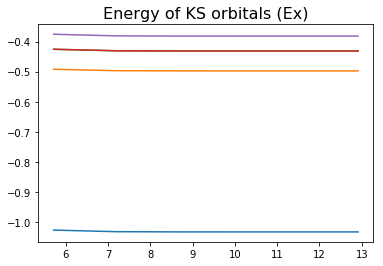

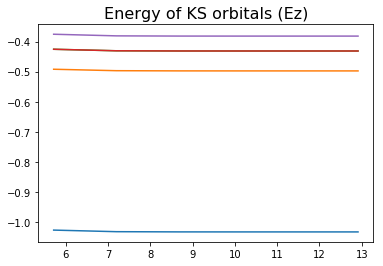

In [27]:
for orb in range(norb):
    plt.plot(dimBoxEx,enEx[orb])
plt.title('Energy of KS orbitals (Ex)',fontsize=16)
plt.show()

for orb in range(norb):
    plt.plot(dimBoxEz,enEz[orb])
plt.title('Energy of KS orbitals (Ez)',fontsize=16)
plt.show()

We also plot the difference between the energy of each orbital and its value for the greatest simulation box

In [28]:
deltaEx=[]
for orb in range(norb):
    delta = enEx[orb]-enEx[orb][nRunEx-1]
    deltaEx.append(delta)
    
deltaEz=[]
for orb in range(norb):
    delta = enEz[orb]-enEz[orb][nRunEz-1]
    deltaEz.append(delta)

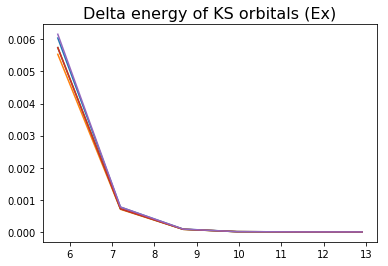

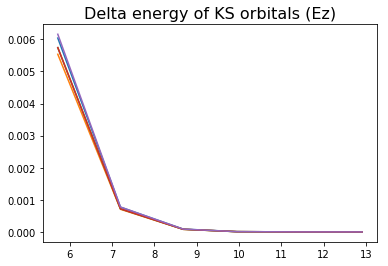

In [29]:
for orb in range(norb):
    plt.plot(dimBoxEx,deltaEx[orb])
plt.title('Delta energy of KS orbitals (Ex)',fontsize=16)
plt.show()

for orb in range(norb):
    plt.plot(dimBoxEz,deltaEz[orb])
plt.title('Delta energy of KS orbitals (Ez)',fontsize=16)
plt.show()

In [30]:
dipoleX.append(Ex[nRunEx-1].log['Electric Dipole Moment (AU)']['P vector'][0])
dipoleZ.append(Ez[nRunEx-1].log['Electric Dipole Moment (AU)']['P vector'][2])
eFieldX.append(enorm)
eFieldZ.append(enorm)

# $E$-norm = $1e^{-2}$

## Set up of the simulations

We build a set of input files with increasing values of the box dimension for both the x and z electric field configurations. 

In [31]:
enorm = 1e-2
en = str('1em2_')

In [32]:
ez=[0.0,0.0,enorm]
ex=[enorm,0.0,0.0]

In [33]:
inpEz={'dft':{'elecfield': ez}}
inpEx={'dft':{'elecfield': ex}}

In [34]:
rmult = [[float(i), 9.0] for i in range(4,10)]
rmult

[[4.0, 9.0], [5.0, 9.0], [6.0, 9.0], [7.0, 9.0], [8.0, 9.0], [9.0, 9.0]]

In [35]:
lrun=[]
for r in rmult:
    inpEz['dft']['rmult'] = r
    inpEx['dft']['rmult'] = r
    inpnameEz = 'Ez_'+en+str('rmult_')+str(r[0])
    inpnameEx = 'Ex_'+en+str('rmult_')+str(r[0])
    Yaml.dump(inpEz,inputpath + inpnameEz + '.yaml')
    Yaml.dump(inpEx,inputpath + inpnameEx + '.yaml')
    lrun.append(inpnameEz)
    lrun.append(inpnameEx)
Yaml.dump(lrun,inputpath+'runs_'+en)

## Data analysis

Now we plot the energy of the KS orbitals as a function of the dimension of the box. We import the log files with the results of the simulations:

In [36]:
logsEx = !ls log/log-Ex_1em2*
Ex=[lf.Logfile(l) for l in logsEx]
nRunEx=len(Ex)
print(logsEx)

logsEz = !ls log/log-Ez_1em2*
Ez=[lf.Logfile(l) for l in logsEz]
nRunEz=len(Ez)
print(logsEz)

['log/log-Ex_1em2_rmult_4.0.yaml', 'log/log-Ex_1em2_rmult_5.0.yaml', 'log/log-Ex_1em2_rmult_6.0.yaml', 'log/log-Ex_1em2_rmult_7.0.yaml', 'log/log-Ex_1em2_rmult_7_wf.yaml', 'log/log-Ex_1em2_rmult_8.0.yaml', 'log/log-Ex_1em2_rmult_9.0.yaml']
['log/log-Ez_1em2_rmult_4.0.yaml', 'log/log-Ez_1em2_rmult_5.0.yaml', 'log/log-Ez_1em2_rmult_6.0.yaml', 'log/log-Ez_1em2_rmult_7.0.yaml', 'log/log-Ez_1em2_rmult_7_wf.yaml', 'log/log-Ez_1em2_rmult_8.0.yaml', 'log/log-Ez_1em2_rmult_9.0.yaml']


for each run i the lists Ex[i].evals[0][0] and Ez[i].evals[0][0] contain the energy of the orbitals, for instance:

In [37]:
Ez[0].evals[0][0]

BandArray([-1.02650501, -0.4921193 , -0.42574634, -0.425744  , -0.37584628])

 The number of orbitals is given by:

In [38]:
norb =len(Ex[0].evals[0][0])

we introduce the lists enEx[i], enEz[i] (with i in range(norb)) that contains the energy of the i-th orbital for
all the runs

In [39]:
enEx=[]
for orb in range(norb):
    eorb=[]
    for run in range(nRunEx):
        eorb.append(Ex[run].evals[0][0][orb])
    enEx.append(eorb)

enEz=[]
for orb in range(norb):
    eorb=[]
    for run in range(nRunEx):
        eorb.append(Ez[run].evals[0][0][orb])
    enEz.append(eorb)

In [40]:
dimBoxEx=[]
dimBoxEz=[]
for ind in range(nRunEx):
    dimBoxEx.append(Ex[ind].log['Sizes of the simulation domain']['Angstroem'][0])
    dimBoxEz.append(Ez[ind].log['Sizes of the simulation domain']['Angstroem'][0])

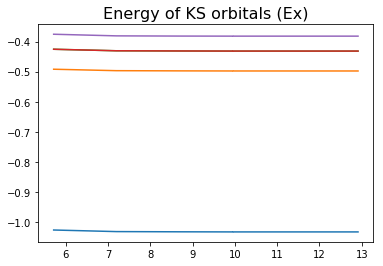

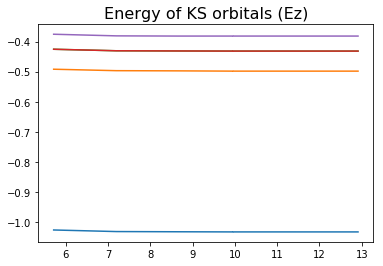

In [41]:
for orb in range(norb):
    plt.plot(dimBoxEx,enEx[orb])
plt.title('Energy of KS orbitals (Ex)',fontsize=16)
plt.show()

for orb in range(norb):
    plt.plot(dimBoxEz,enEz[orb])
plt.title('Energy of KS orbitals (Ez)',fontsize=16)
plt.show()

We also plot the difference between the energy of each orbital and its value for the greatest simulation box

In [42]:
deltaEx=[]
for orb in range(norb):
    delta = enEx[orb]-enEx[orb][nRunEx-1]
    deltaEx.append(delta)
    
deltaEz=[]
for orb in range(norb):
    delta = enEz[orb]-enEz[orb][nRunEz-1]
    deltaEz.append(delta)

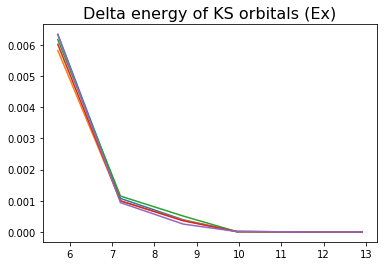

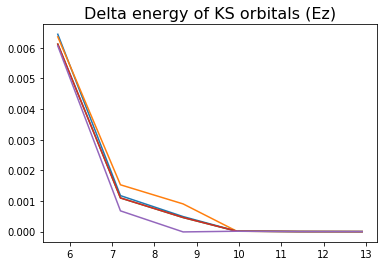

In [43]:
for orb in range(norb):
    plt.plot(dimBoxEx,deltaEx[orb])
plt.title('Delta energy of KS orbitals (Ex)',fontsize=16)
plt.show()

for orb in range(norb):
    plt.plot(dimBoxEz,deltaEz[orb])
plt.title('Delta energy of KS orbitals (Ez)',fontsize=16)
plt.show()

In [44]:
dipoleX.append(Ex[nRunEx-1].log['Electric Dipole Moment (AU)']['P vector'][0])
dipoleZ.append(Ez[nRunEx-1].log['Electric Dipole Moment (AU)']['P vector'][2])
eFieldX.append(enorm)
eFieldZ.append(enorm)

# $E$-norm = $1e^{-1}$

## Set up of the simulations

We build a set of input files with increasing values of the box dimension for both the x and z electric field configurations. 

In [45]:
enorm = 1e-1
en = str('1em1_')

In [46]:
ez=[0.0,0.0,enorm]
ex=[enorm,0.0,0.0]

In [47]:
inpEz={'dft':{'elecfield': ez}}
inpEx={'dft':{'elecfield': ex}}

In [48]:
rmult = [[float(i), 9.0] for i in range(4,10)]
rmult

[[4.0, 9.0], [5.0, 9.0], [6.0, 9.0], [7.0, 9.0], [8.0, 9.0], [9.0, 9.0]]

In [49]:
lrun=[]
for r in rmult:
    inpEz['dft']['rmult'] = r
    inpEx['dft']['rmult'] = r
    inpnameEz = 'Ez_'+en+str('rmult_')+str(r[0])
    inpnameEx = 'Ex_'+en+str('rmult_')+str(r[0])
    Yaml.dump(inpEz,inputpath + inpnameEz + '.yaml')
    Yaml.dump(inpEx,inputpath + inpnameEx + '.yaml')
    lrun.append(inpnameEz)
    lrun.append(inpnameEx)
Yaml.dump(lrun,inputpath+'runs_'+en)

## Data analysis

Now we plot the energy of the KS orbitals as a function of the dimension of the box. We import the log files with the results of the simulations:

In [50]:
logsEx = !ls log/log-Ex_1em1*
Ex=[lf.Logfile(l) for l in logsEx]
nRunEx=len(Ex)
print(logsEx)

logsEz = !ls log/log-Ez_1em1*
Ez=[lf.Logfile(l) for l in logsEz]
nRunEz=len(Ez)
print(logsEz)

['log/log-Ex_1em1_rmult_4.0.yaml', 'log/log-Ex_1em1_rmult_5.0.yaml', 'log/log-Ex_1em1_rmult_6.0.yaml', 'log/log-Ex_1em1_rmult_7.0.yaml', 'log/log-Ex_1em1_rmult_8.0.yaml', 'log/log-Ex_1em1_rmult_9.0.yaml']
['log/log-Ez_1em1_rmult_4.0.yaml', 'log/log-Ez_1em1_rmult_5.0.yaml', 'log/log-Ez_1em1_rmult_6.0.yaml', 'log/log-Ez_1em1_rmult_7.0.yaml', 'log/log-Ez_1em1_rmult_8.0.yaml', 'log/log-Ez_1em1_rmult_9.0.yaml']


for each run i the lists Ex[i].evals[0][0] and Ez[i].evals[0][0] contain the energy of the orbitals, for instance:

In [51]:
Ez[0].evals[0][0]

BandArray([-1.05596089, -0.55331142, -0.45380212, -0.45379978, -0.36699289])

 The number of orbitals is given by:

In [52]:
norb =len(Ex[0].evals[0][0])

we introduce the lists enEx[i], enEz[i] (with i in range(norb)) that contains the energy of the i-th orbital for
all the runs

In [53]:
enEx=[]
for orb in range(norb):
    eorb=[]
    for run in range(nRunEx):
        eorb.append(Ex[run].evals[0][0][orb])
    enEx.append(eorb)

enEz=[]
for orb in range(norb):
    eorb=[]
    for run in range(nRunEx):
        eorb.append(Ez[run].evals[0][0][orb])
    enEz.append(eorb)

In [54]:
dimBoxEx=[]
dimBoxEz=[]
for ind in range(nRunEx):
    dimBoxEx.append(Ex[ind].log['Sizes of the simulation domain']['Angstroem'][0])
    dimBoxEz.append(Ez[ind].log['Sizes of the simulation domain']['Angstroem'][0])

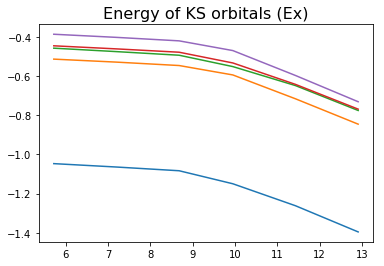

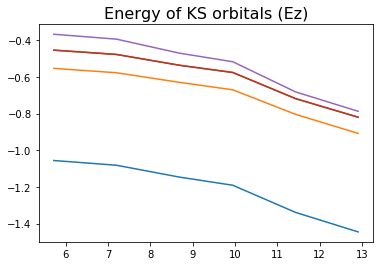

In [55]:
for orb in range(norb):
    plt.plot(dimBoxEx,enEx[orb])
plt.title('Energy of KS orbitals (Ex)',fontsize=16)
plt.show()

for orb in range(norb):
    plt.plot(dimBoxEz,enEz[orb])
plt.title('Energy of KS orbitals (Ez)',fontsize=16)
plt.show()

In this case we observe that the self consistent cicles stop at itermax, so probabibly the system is not converging

## Computation of the linear polarizability

We plot the induced dipole moment vs. the corresponding component of the electric field (for the field norm up to $1e-2$)

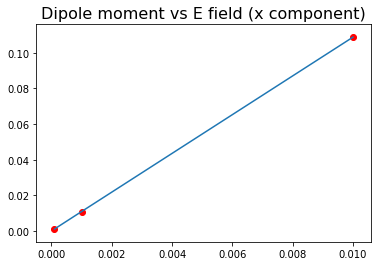

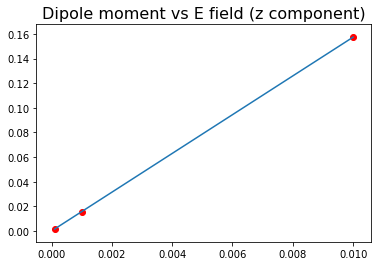

In [56]:
plt.plot(eFieldX,dipoleX)
plt.scatter(eFieldX,dipoleX, color='r')
plt.title('Dipole moment vs E field (x component)',fontsize=16)
plt.show()

plt.plot(eFieldZ,dipoleZ)
plt.scatter(eFieldZ,dipoleZ, color='r')
plt.title('Dipole moment vs E field (z component)',fontsize=16)
plt.show()

In [57]:
alphaZ = dipoleZ[-1]/eFieldZ[-1]
alphaX = dipoleX[-1]/eFieldX[-1]
print('alphaZ = ' + str(alphaZ))
print('alphaX = ' + str(alphaX))

alphaZ = 15.744
alphaX = 10.878


## Computation of the orbitals

As a final task of thi nb we compute the KS orbitals of the ground state for the field norm equal to $1e-2$, which is the highest computed value of the field for which the linear response regime has been confirmed. We reduce the value of gnrm_cv to 1e-8 to have a more precise reference result.

First we perform this computation for rmult = 7

In [62]:
enorm = 1e-2
en = str('1em2_')

In [63]:
ez=[0.0,0.0,enorm]
ex=[enorm,0.0,0.0]

In [64]:
inpEz={'dft':
       {'elecfield': ez, 
        'rmult' : [7.0, 9.0],
        'gnrm_cv' : 1e-8,
        'output_wf' : 2},
       'radical' : 'Ez_1em2_rmult_7'}
inpEx={'dft':
       {'elecfield': ex, 
        'rmult' : [7.0, 9.0],
        'gnrm_cv' : 1e-8,
        'output_wf' : 2},
       'radical' : 'Ex_1em2_rmult_7'}

In [61]:
inpnameEz = 'Ez_'+en+str('rmult_7_')+'wf'
inpnameEx = 'Ex_'+en+str('rmult_7_')+'wf'
Yaml.dump(inpEz,inputpath + inpnameEz + '.yaml')
Yaml.dump(inpEx,inputpath + inpnameEx + '.yaml')


Now we repeat the computation for rmult = 9

In [65]:
inpEz={'dft':
       {'elecfield': ez, 
        'rmult' : [9.0, 9.0],
        'gnrm_cv' : 1e-8,
        'output_wf' : 2},
       'radical' : 'Ez_1em2_rmult_9'}
inpEx={'dft':
       {'elecfield': ex, 
        'rmult' : [9.0, 9.0],
        'gnrm_cv' : 1e-8,
        'output_wf' : 2},
       'radical' : 'Ex_1em2_rmult_9'}

In [67]:
inpnameEz = 'Ez_'+en+str('rmult_9_')+'wf'
inpnameEx = 'Ex_'+en+str('rmult_9_')+'wf'
Yaml.dump(inpEz,inputpath + inpnameEz + '.yaml')
Yaml.dump(inpEx,inputpath + inpnameEx + '.yaml')